## **Análise exploratória**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [2]:
#Configuração para poder apresentar todas as linhas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('dados_tratados.csv')
X_dados_balanceados = pd.read_csv('X_dados_balanceados.csv')
y = pd.read_csv('y.csv')

In [4]:
#Organizando as colunas do dataframe 
df = df[['idade', 'profissao', 'estado_civil', 'educacao', 'inadimplente',
       'emprestimo_moradia', 'emprestimo_pessoal', 'meio_contato', 'mes',
       'dia_da_semana', 'duracao', 'qtd_contatos_campanha',
       'dias_ultimo_contato', 'qtd_contatos_total',
       'indice_precos_consumidor', 'indice_confianca_consumidor',
       'taxa_juros_media', 'analfabeto', 'curso_tecnico',
       'ensino_medio', 'fundamental_4a', 'fundamental_6a', 'fundamental_9a',
       'graduacao_completa', 'admin.', 'aposentado', 'colarinho_azul',
       'desempregado', 'dona_casa', 'empreendedor', 'estudante', 'gerente',
       'informal', 'servicos', 'tecnico', 'taxa_juros_media_normalizado',
       'indice_precos_consumidor_normalizado',
       'indice_confianca_consumidor_normalizado', 'campanha_anterior', 'aderencia_campanha']].copy()

In [5]:
X_dados_balanceados.head()

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado
0,56,0,0,0,0,5,1,261.0,1,999,0,2,93,-36,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.8,0.5,0.583333
1,57,0,0,0,0,5,1,149.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333
2,37,0,1,0,0,5,1,226.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333
3,40,0,0,0,0,5,1,151.0,1,999,0,2,93,-36,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.8,0.5,0.583333
4,56,0,0,1,0,5,1,307.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333


Primeiramente eu gosto sempre de plotar os gráficos para entender como algumas variáveis estão distribuidas e ter um primeiro entendimento de quais seriam interessantes de explorar na análise.

Lembrar que estamos trabalhando com dados de pessoas, então é bom entender qual o comportamento/padrão dessas pessoas que os dados estão relacionados.

Principalmente as variáveis que são categóricas e as variáveis que eram categóricas e foram transformadas em binárias.

In [6]:
teste_categ = ['profissao', 'educacao', 'inadimplente',
       'emprestimo_moradia', 'emprestimo_pessoal', 'meio_contato',  'campanha_anterior', 'dia_da_semana', 'mes']

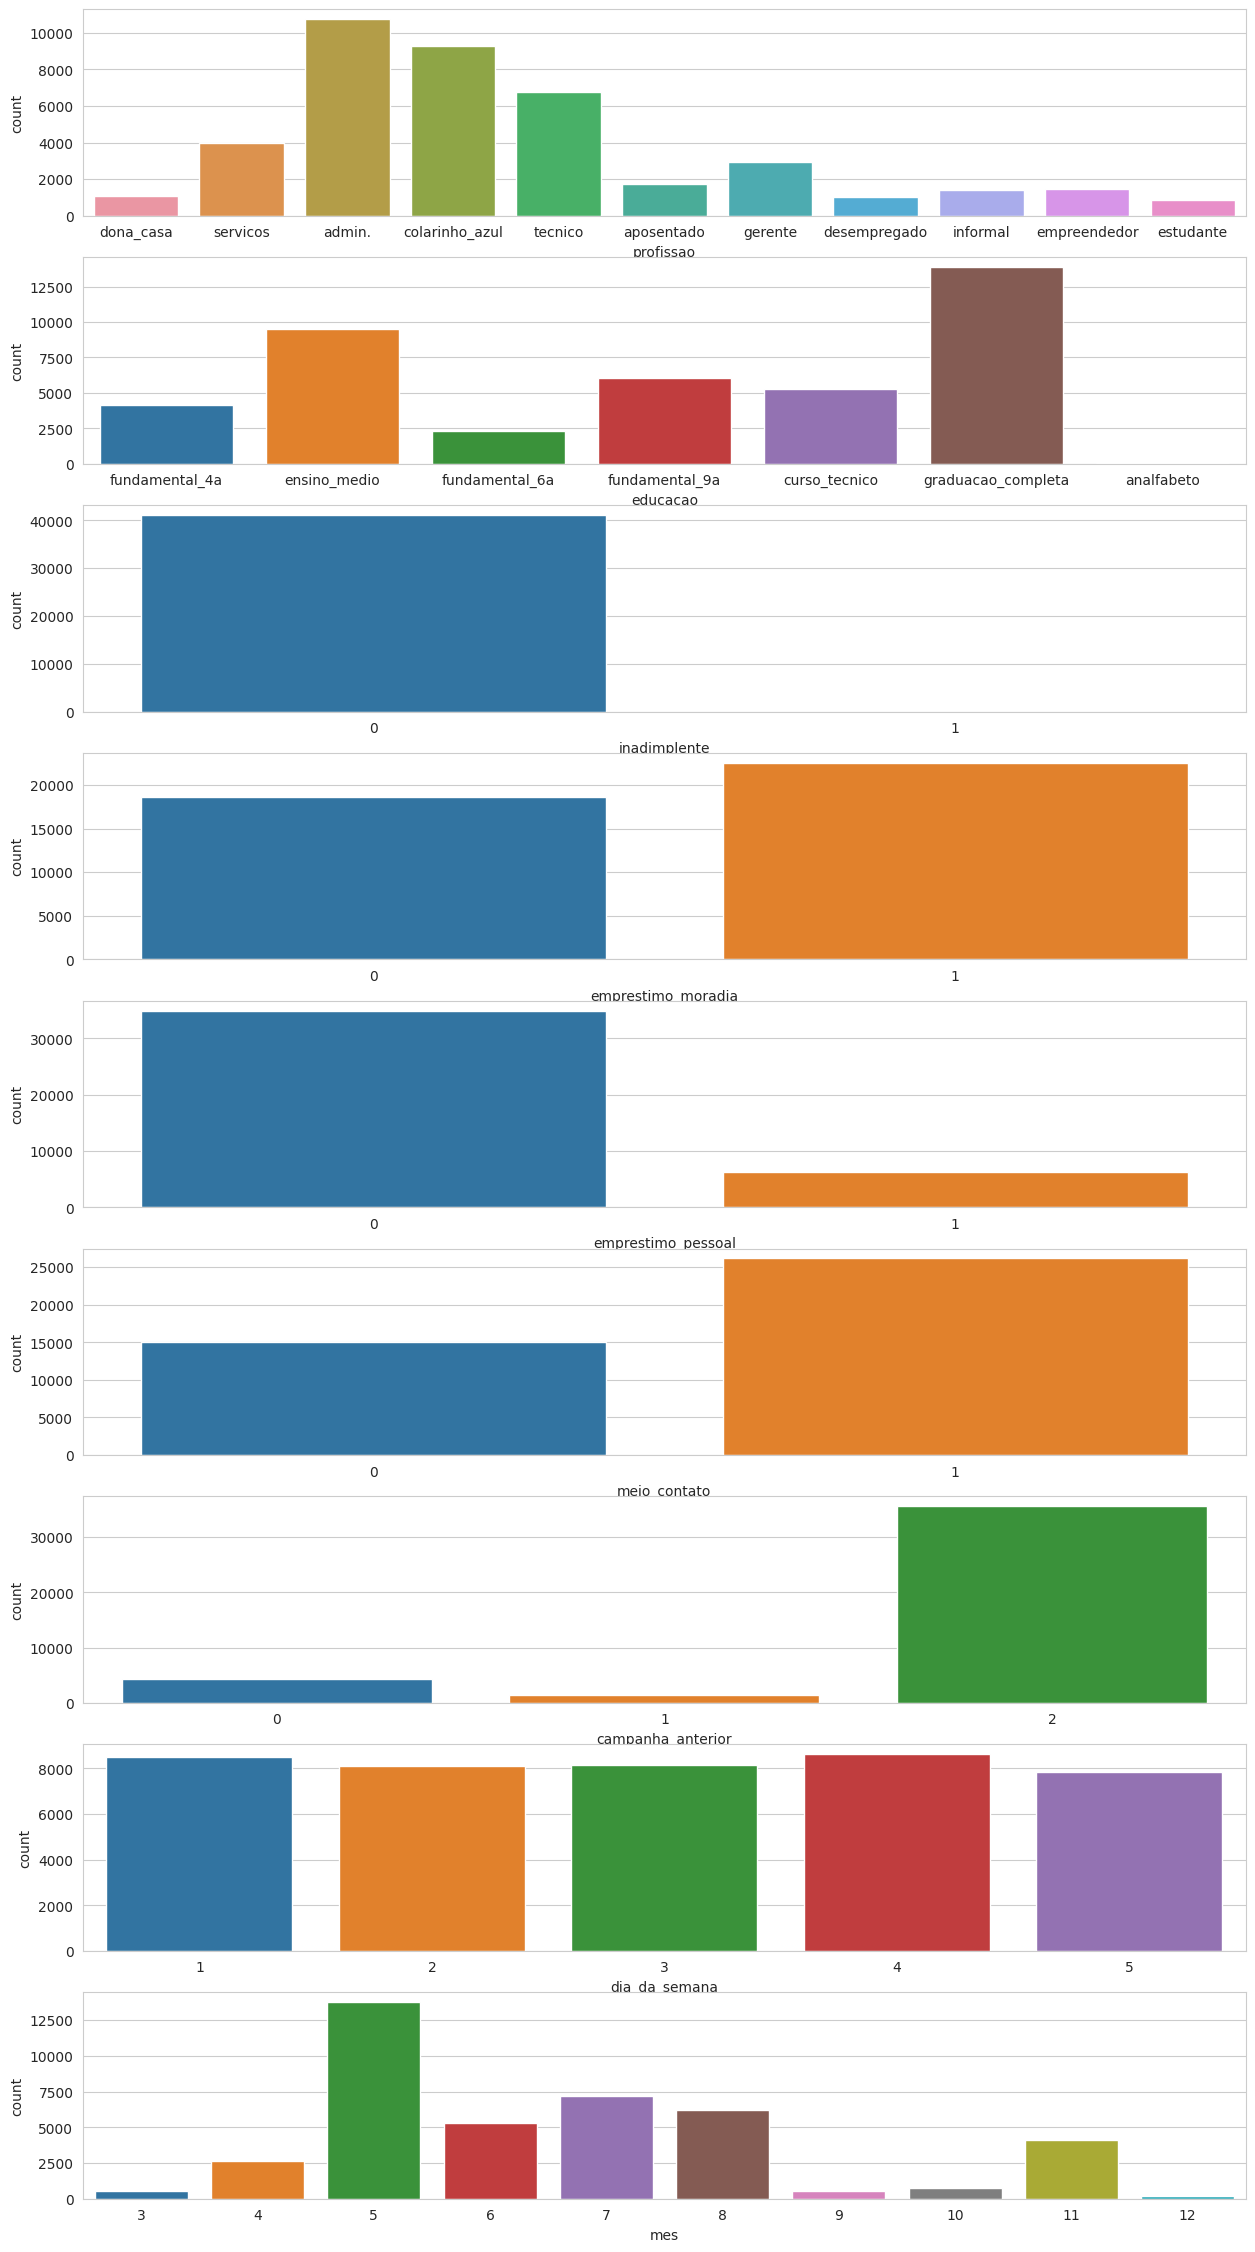

In [7]:
fig,axs = plt.subplots(len(teste_categ),1,figsize=(15,29))

i=0

for coluna in teste_categ:
    sns.countplot(data=df, x=coluna, ax=axs[i])
  
    i = i + 1

### **Notas**

* As variáveis inadiplemente e emprestimo pessoal por ter um alto desbalanceamento, a classe marjoritaria possivelmente tenha um peso maior para o problema. 

* A maioria das pessoas que envolvem o problema desses dados tem uma boa educação e profissão, e isso possivelmente irá impactar no problema, de modo que a probabilidade dessas pessoas aderir a campanha sejam maiores.

* Também é possível observar que o principal meio de contato é o celular.

* Ao olhar para os gráficos temporais, respectivamente referente aos dias da semana e meses, é possível observar que em sua maioria os clientes estão relacionados as quintas-feiras e ao mês maio.

In [8]:
df.inadimplente.value_counts()

0    41185
1        3
Name: inadimplente, dtype: int64

A variável inadimplente possui um desbalanceamento muito alto, por esse motivo o uso dela será descartado.

Agora irei buscar entender como algumas variáveis se comportam diante da variável target de aderencia da campanha. Iniciando o que pode ser considerando como uma análise exploratória multivariada, vejamos:

### **Impacto das variáveis temporais para o problema**

mes
3     276
4     539
5     886
6     559
7     649
8     655
9     256
10    315
11    416
12     89
Name: aderencia_campanha, dtype: int64


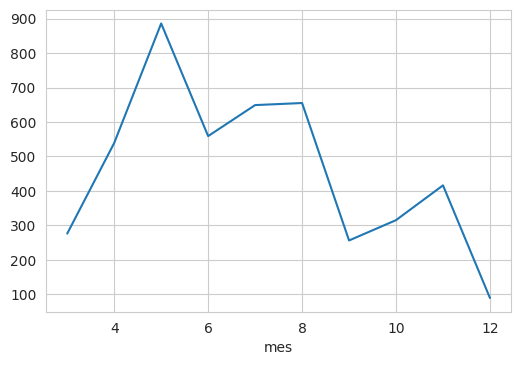

In [9]:
df.groupby(['mes'])['aderencia_campanha'].sum().plot()
print(df.groupby(['mes'])['aderencia_campanha'].sum())

dia_da_semana
1     847
2     953
3     949
4    1045
5     846
Name: aderencia_campanha, dtype: int64


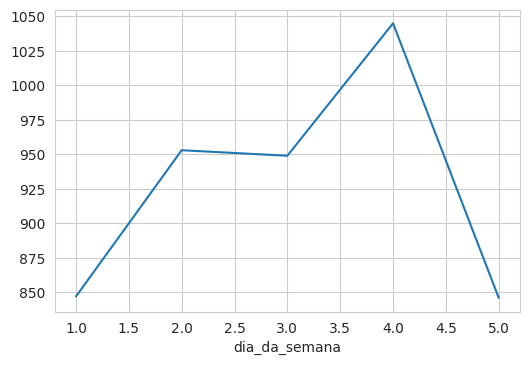

In [10]:
df.groupby(['dia_da_semana'])['aderencia_campanha'].sum().plot()
print(df.groupby(['dia_da_semana'])['aderencia_campanha'].sum())

In [48]:
quinta = df.query('dia_da_semana == 4')

In [50]:
quinta.aderencia_campanha.value_counts()

0    7578
1    1045
Name: aderencia_campanha, dtype: int64

**Notas** 

* É possível notar a partir desses dados, que as campanhas tem maiores chances de ter adesão no mês de maio e a adesão tende a diminuir nos próximos meses, chegando ao menor número de adesão em dezembro. Ou seja, ao iniciar o ano a campanha consegue ter uma boa adesão, porém vai caindo no inicio do segundo semestre do ano. 

* Por outro lado, observa-se que para os dias semanais, a campanha possui uma forte adesão entre as quartas e quinta-feiras.

### **Impacto das variáveis profissão, educação e estado civil para o problema**

<AxesSubplot:xlabel='profissao'>

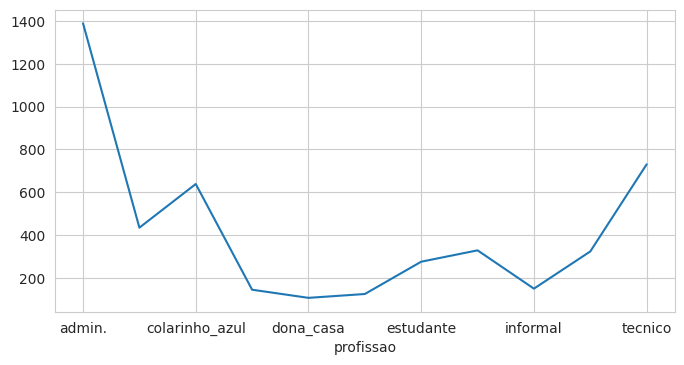

In [11]:
df.groupby(['profissao'])['aderencia_campanha'].sum().plot(figsize=(8,4))

<AxesSubplot:xlabel='educacao'>

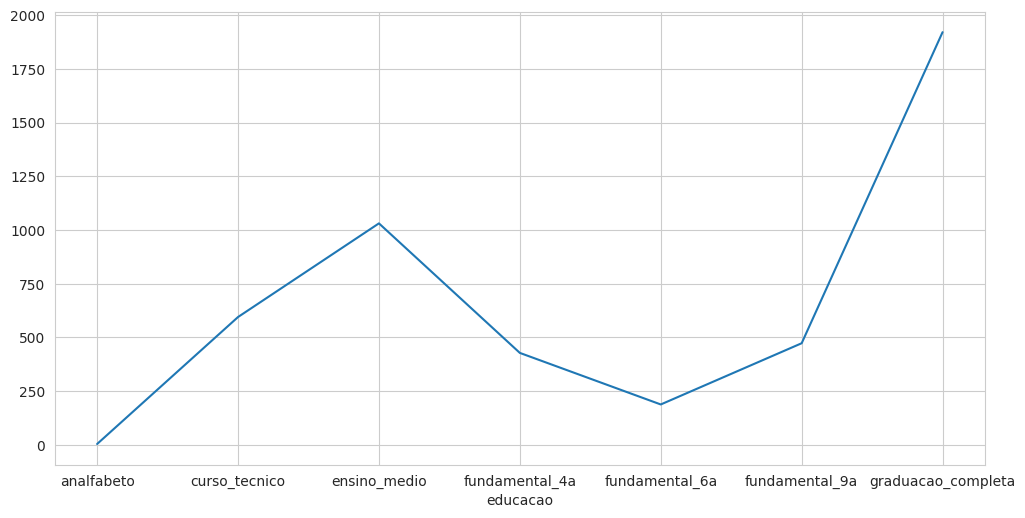

In [12]:
df.groupby(['educacao'])['aderencia_campanha'].sum().plot(figsize=(12,6))

* É possível notar que quanto mais alto o grau de escolaridade e profissão, maior a aderência da campanha. Esse insight pode ser útil até mesmo para descartarmos as colunas de categórias binárias dessas escolaridades e profissões mais baixas, que foram criadas no processamento dos dados.

* Apesar de que este entendimento já havia sido comentado antes e faz sentido o resultado apresentado, tendo em vista que possivelmente existe uma tendência para as pessoas que tem uma educação e profissão melhores, logo tenham condições melhores e consequentemente mais chances de aderir a campanha. 

* Outro ponto importante é a aderência da campanha dos profissionais "colarinho azul" que tratam-se dos trabalhadores que normalmente realizam trabalhos manuais ou braçais em indústrias. 


<AxesSubplot:xlabel='estado_civil'>

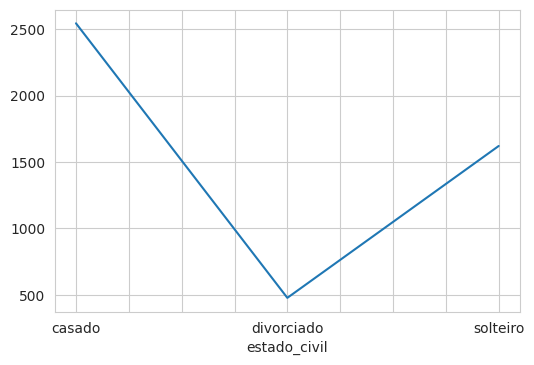

In [13]:
df.groupby(['estado_civil'])['aderencia_campanha'].sum().plot()

Com esse resultado o que está claro é que quando existe uma estabilidade, seja familiar ou financeira, a pessoa tende mais a aderir a campanha.

### **Análise de perfil**

Entender qual o perfil das pessoas, principalmente das que aderem a campanha, é de suma importância para entender quais os recursos acabam sendo mais relevantes para o problema e de que forma ele impacta no resultado final que é a adesão ou não da campanha.

O principal perfil para investigar e entender são os das pessoas que a campanha anterior não existiu, tendo em vista que a distribuição dos dados são maiores. Ou seja, para a maioria das pessoas que envolve os dados e o problema, a campanha anterior não existiu.

**Pessoas que a campanha anterior não existiu e aderiram a Campanha**

Irei criar outros dois perfis com base na campanha anterior, mas a ideia é focar para quando a campanha anterior não existiu.

In [14]:
#### **Pessoas que aderiram a campanha e teve sucesso na adesão da campanha anterior**
clientes_sucesso_aderiuCampanha = df.query("campanha_anterior == 1 & aderencia_campanha == 1 ")

#### **Pessoas que aderiram a campanha e não teve sucesso na adesão da campanha anterior**
clientes_semSucesso_aderiuCampanha = df.query("campanha_anterior == 0 & aderencia_campanha == 1 ") 

#### **Pessoas que aderiram a campanha e não existiu a campanha anterior**
clientes_semCampanhaAnterior_aderiuCampanha = df.query("campanha_anterior == 2 & aderencia_campanha == 1 ")

Perguntas que estou tentando buscar responder:

* Qual a média de idade? 
* Educação
* Profissão
* duração
* Aderência d campanha por dia

Então como dito, a ideia principal é analisar o perfil das **pessoas que a campanha anterior não existiu**. Comparando as suas informações para quando aderiram e também não aderiram a campanha, por ser o maior grupo do conjunto de dados.

In [15]:
clientes_semCampanhaAnterior_aderiuCampanha.idade.mean()

40.17319325055715

In [16]:
clientes_semCampanhaAnterior_aderiuCampanha.groupby(['educacao'])['aderencia_campanha'].sum().sort_values(ascending=False)

educacao
graduacao_completa    1253
ensino_medio           709
curso_tecnico          382
fundamental_9a         361
fundamental_4a         287
fundamental_6a         146
analfabeto               3
Name: aderencia_campanha, dtype: int64

In [17]:
clientes_semCampanhaAnterior_aderiuCampanha.groupby(['profissao'])['aderencia_campanha'].sum().sort_values(ascending=False)

profissao
admin.            923
colarinho_azul    509
tecnico           481
aposentado        254
servicos          239
gerente           219
estudante         148
informal          115
empreendedor      102
desempregado       84
dona_casa          67
Name: aderencia_campanha, dtype: int64

In [18]:
clientes_semCampanhaAnterior_aderiuCampanha.groupby(['duracao'])['aderencia_campanha'].sum().sort_values(ascending=False)[:10]

duracao
394    9
396    9
395    8
156    8
160    8
618    8
543    8
245    8
251    8
709    8
Name: aderencia_campanha, dtype: int64

In [19]:
clientes_semCampanhaAnterior_aderiuCampanha.groupby('dia_da_semana')['aderencia_campanha'].sum().reset_index().sort_values(ascending=False,by='aderencia_campanha') 

,dia_da_semana,aderencia_campanha
3,4,703
2,3,646
1,2,625
0,1,585
4,5,582


Agora irei comparar as informações da aderencia da campanha com as da não aderência da campanha, para as pessoas que a campanha anterior não existiu.

**Pessoas a campanha anterior não existiu e não aderiram a Campanha**

In [20]:
#### **Pessoas que não aderiram a campanha e teve sucesso na adesão da campanha anterior**
clientes_sucesso_naoAderiuCampanha = df.query("campanha_anterior == 1 & aderencia_campanha == 0")

#### **Pessoas que não aderiram a campanha e não teve sucesso na adesão da campanha anterior**
clientes_semSucesso_naoAderiuCampanha = df.query("campanha_anterior == 0 & aderencia_campanha == 0 ") 

#### **Pessoas que não aderiram a campanha e não existiu a campanha anterior**
clientes_semCampanhaAnterior_naoAderiuCampanha = df.query("campanha_anterior == 2 & aderencia_campanha == 0")

In [21]:
clientes_semCampanhaAnterior_naoAderiuCampanha.idade.mean()

39.93516747887237

In [22]:
clientes_semCampanhaAnterior_naoAderiuCampanha.educacao.value_counts()

graduacao_completa    10601
ensino_medio           7393
fundamental_9a         4943
curso_tecnico          4175
fundamental_4a         3409
fundamental_6a         1888
analfabeto               13
Name: educacao, dtype: int64

In [23]:
clientes_semCampanhaAnterior_naoAderiuCampanha.profissao.value_counts()

admin.            8273
colarinho_azul    7740
tecnico           5433
servicos          3212
gerente           2279
empreendedor      1175
informal          1131
aposentado        1078
dona_casa          881
desempregado       774
estudante          446
Name: profissao, dtype: int64

In [24]:
clientes_semCampanhaAnterior_naoAderiuCampanha.duracao.value_counts()

73      152
85      152
90      148
72      143
111     143
       ... 
957       1
1992      1
819       1
1478      1
3785      1
Name: duracao, Length: 1226, dtype: int64

In [25]:
clientes_semCampanhaAnterior_naoAderiuCampanha.groupby('dia_da_semana')['aderencia_campanha'].count()

dia_da_semana
1    6779
2    6369
3    6414
4    6739
5    6121
Name: aderencia_campanha, dtype: int64

**Notas**

* Note que a principal diferença está na duração, para as pessoas que não aderiram a campanha a duração da campanha foi menor, ao contrário das pessoas que aderiram a campanha, onde a duração acaba sendo maior.

Vale lembrar que existe um desbalanceamento nesses dados que estão sendo observados, ou seja, a quantidade de pessoas que aderiram a campanha é bem menor do que a não aderencia da campanha. Porém, este problema já foi resolvido na preparação dos dados, mas para esse caso em especifico é preciso observar as variáveis categóricas que não tem no conjunto de dados balanceados.

Esses perfis serviram de base para a criação de novas variáveis na próxima etapa, tendo em vista que isso pode acabar sendo muito importante para o problema, logo contribue com o modelo de machine learning.

## **Análise exploratória Multivariada**

A análise com estatística multivariada consiste em considerar duas ou mais variáveis simultaneamente e entender como elas se relacionam.

Então a ideia é entender como algumas variáveis númericas e binárias se comportam diante da variável target, com os dados que foram balanceados.

In [27]:
X_dados_balanceados.head()

,idade,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,aderencia_campanha,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado
0,56,0,0,0,0,5,1,261.0,1,999,0,2,93,-36,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.8,0.5,0.583333
1,57,0,0,0,0,5,1,149.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333
2,37,0,1,0,0,5,1,226.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333
3,40,0,0,0,0,5,1,151.0,1,999,0,2,93,-36,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.8,0.5,0.583333
4,56,0,0,1,0,5,1,307.0,1,999,0,2,93,-36,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333


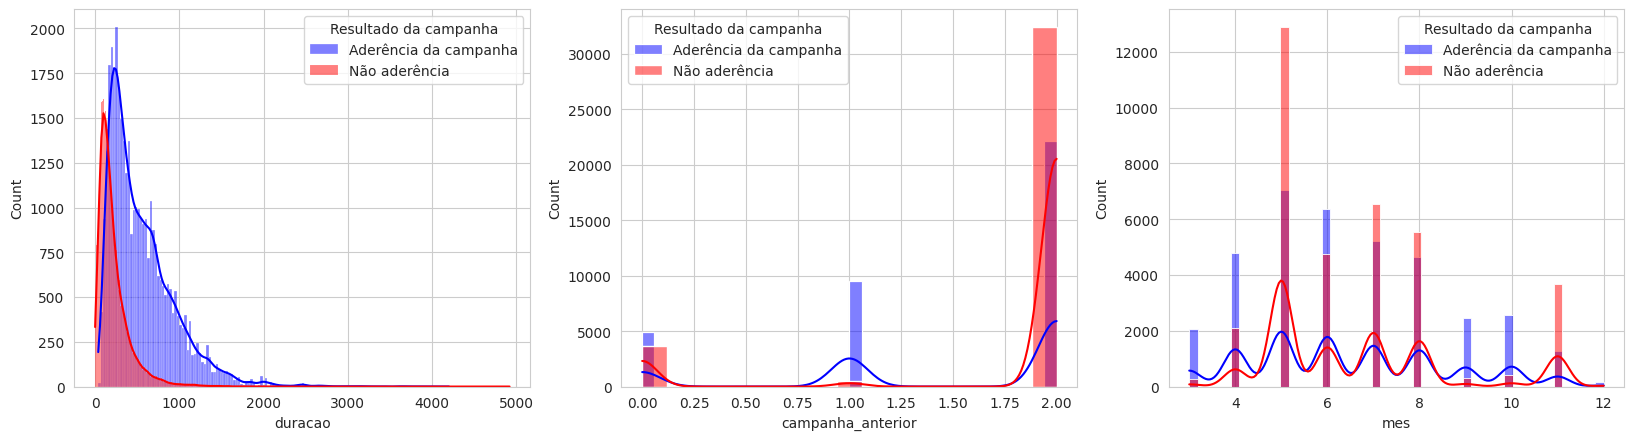

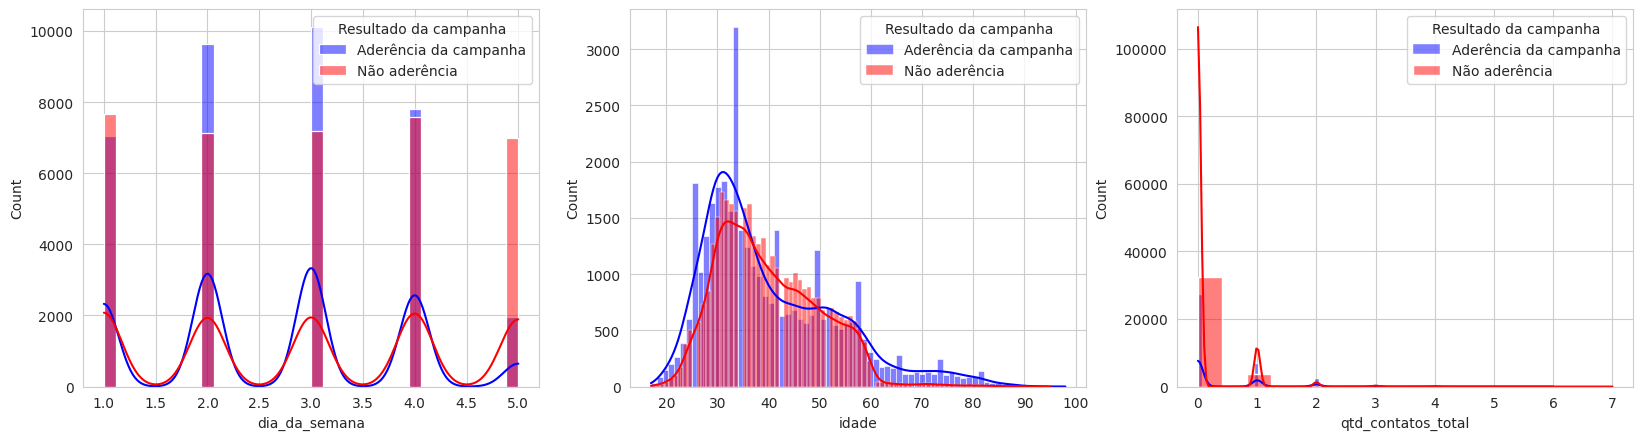

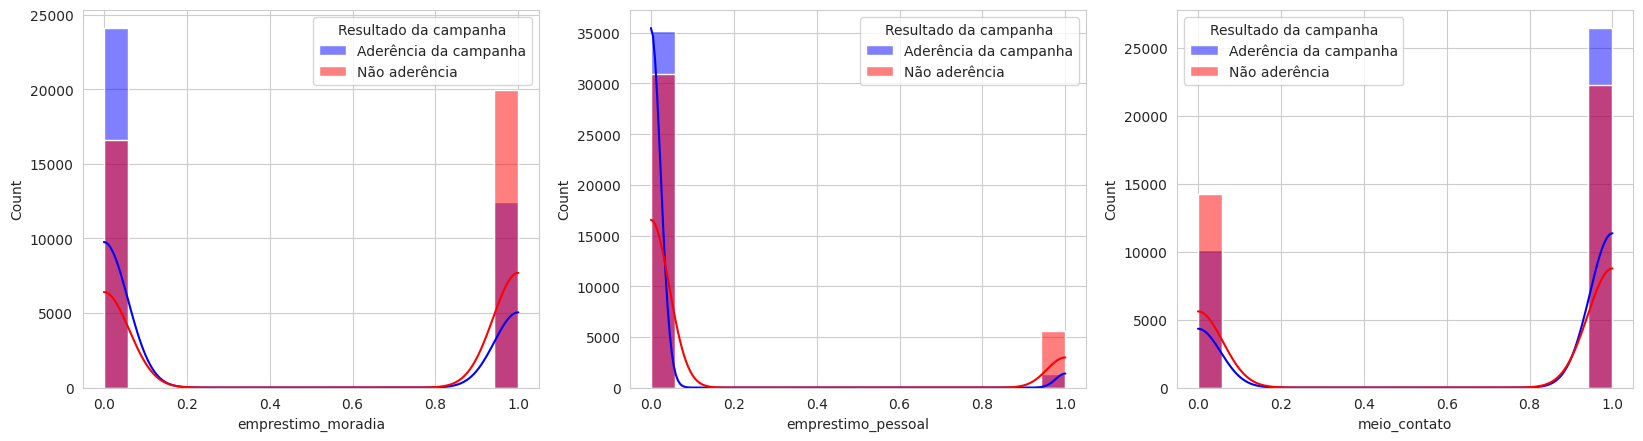

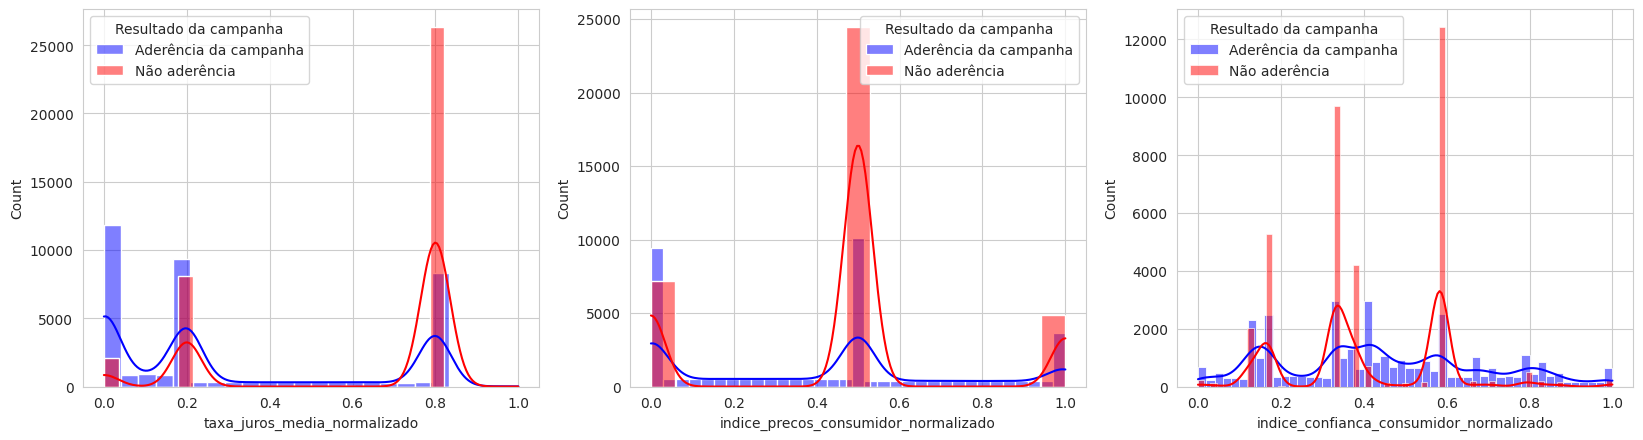

In [28]:
#Variáveis que serão utilizadas
corr_blue = ['duracao','campanha_anterior','mes','dia_da_semana','idade','qtd_contatos_total', 'emprestimo_moradia', 'emprestimo_pessoal','meio_contato', 'taxa_juros_media_normalizado', 'indice_precos_consumidor_normalizado','indice_confianca_consumidor_normalizado']


df_win  = X_dados_balanceados[X_dados_balanceados["aderencia_campanha"]==1]     #Variável alvo para resultado de vitória do lado azul 
df_lose = X_dados_balanceados[X_dados_balanceados["aderencia_campanha"]==0]     #Variável alvo para resultado de derrota do lado azul

#Configurações e plotando o gráfico
c = 0
plt.subplots(figsize=(20,5))
for i in corr_blue:
    plt.subplot(1,3,c+1)
    sns.histplot(df_win[i],label='Aderência da campanha',color='blue', kde=True)
    sns.histplot(df_lose[i],label='Não aderência',color='red', kde=True)
    plt.legend(title='Resultado da campanha')
    c=c+1

    if c == 3:
        plt.show()
        if i != corr_blue[len(corr_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0


### **Notas**

* Uma pessoa que não tem emprestimo moradia e pessoal, provavelmente tem mais chances de aderir a campanha
* Uma pessoa que é conectada pelo meio de contato do celular tem mais chances de aderir a campanha
* A variável emprestimo pessoal por possuirem um desbalanceamento, possivelmente implique em alto impacto no modelo a classe marjoritaria.
* Observa-se também que a duração acaba tendo uma forte influência no problema para a adesão da campanha. No intervalo entre 100 a 1000.
* Pessoas entre 30 a 40 anos tem mais chances de aderir a campanha.
* A quantidade de contatos totais tem forte influência na não aderência da campanha.
* O mês de maio é o que tem o maior número de aderência da campanha, mas também o de não aderência.
* Quanto menor a taxa de juros, maior a aderência.

### **Target x profissão**

In [29]:
df.profissao.value_counts()

admin.            10752
colarinho_azul     9254
tecnico            6743
servicos           3969
gerente            2924
aposentado         1720
empreendedor       1456
informal           1421
dona_casa          1060
desempregado       1014
estudante           875
Name: profissao, dtype: int64

<AxesSubplot:xlabel='profissao', ylabel='count'>

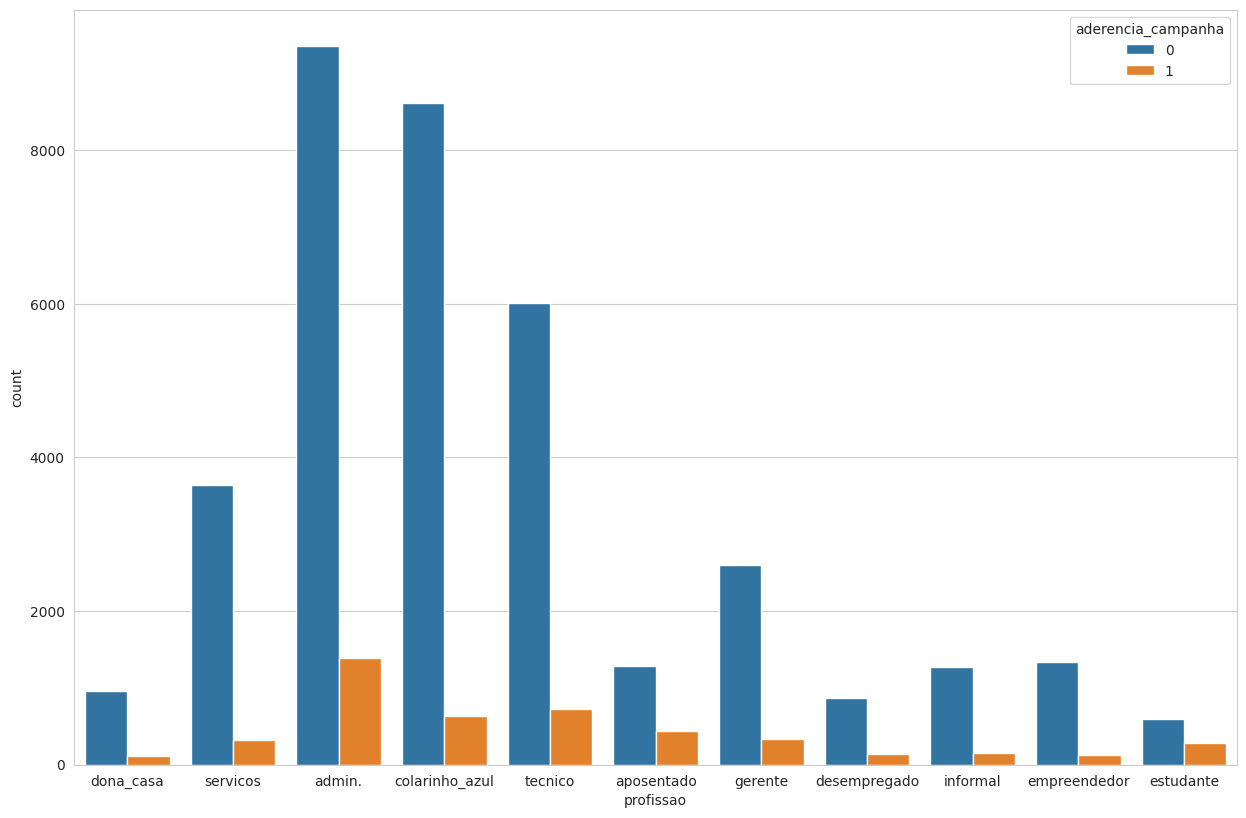

In [30]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=df, x='profissao', hue='aderencia_campanha')

#### **Notas** 

* Interessante observar a relevância que o profissional "colarinho_azul" tem na não adesão da campanha. Estes profissionais são os  membros da classe trabalhadora que normalmente realizam trabalhos manuais ou braçais. E apesar de está em maioria que os profissionais "técnico" no conjunto de dados, acabam sendo minoritários na adesão da campanha para estes profissionais do tipo técnico.

* Outro ponto importante é que apesar de ser minoria no conjunto de dados, os estudantes possuem maior adesão que os profissionais considerados empreendedores.

### **Target x educação**

In [31]:
df.educacao.value_counts()

graduacao_completa    13899
ensino_medio           9515
fundamental_9a         6045
curso_tecnico          5243
fundamental_4a         4176
fundamental_6a         2292
analfabeto               18
Name: educacao, dtype: int64

<AxesSubplot:xlabel='educacao', ylabel='count'>

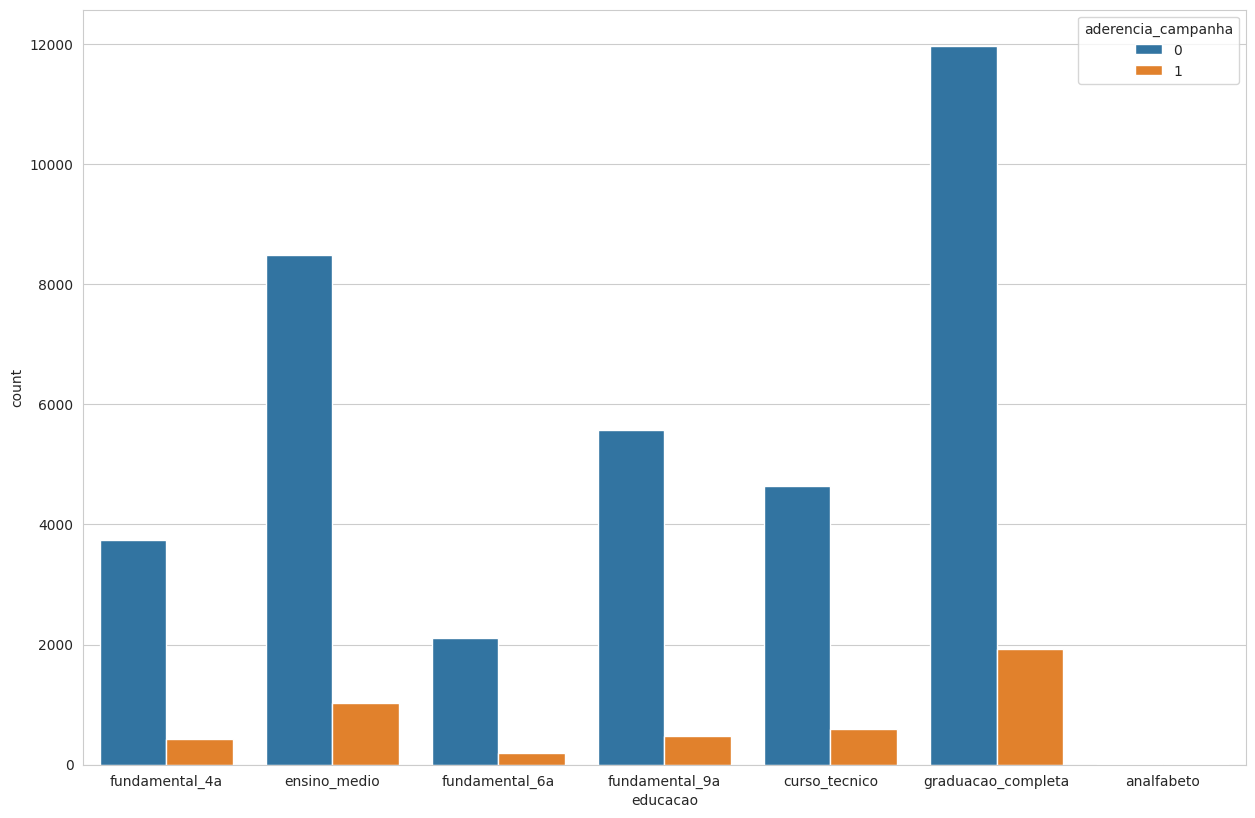

In [32]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=df, x='educacao', hue='aderencia_campanha')

Entenda que as pessoas analfabeta não são tão presentes no conjunto de dados e não irão impactar tanto no problema, e grande maioria dos dados está concentrado nas pessoas que possuem gradução completa, logo são os que mais tem chances de não aderir mas também de aderir a campanha.

O que é interessante de observar nesse gráfico é a inflûencia que as pessoas com fundamental até a 9º educação tem para a não aderência da campanha. Este perfil de pessoas pode está diretamente ligado a pessoas mais velhas, pois anos atrás ter um ensino médio completa era algo bem mais dificil.

#### **Perfil das pessoas com a 9º educação**

In [33]:
perfil_pessoas_9ano = df.query("educacao == 'fundamental_9a'")
perfil_pessoas_9ano.head()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,taxa_juros_media,analfabeto,curso_tecnico,ensino_medio,fundamental_4a,fundamental_6a,fundamental_9a,graduacao_completa,admin.,aposentado,colarinho_azul,desempregado,dona_casa,empreendedor,estudante,gerente,informal,servicos,tecnico,taxa_juros_media_normalizado,indice_precos_consumidor_normalizado,indice_confianca_consumidor_normalizado,campanha_anterior,aderencia_campanha
5,45,servicos,casado,fundamental_9a,0,0,0,0,5,1,198,1,999,0,93,-36,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.8,0.5,0.583333,2,0
15,54,aposentado,casado,fundamental_9a,0,1,1,0,5,1,174,1,999,0,93,-36,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,2,0
18,50,colarinho_azul,casado,fundamental_9a,0,1,1,0,5,1,353,1,999,0,93,-36,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.8,0.5,0.583333,2,0
19,39,gerente,solteiro,fundamental_9a,0,0,0,0,5,1,195,1,999,0,93,-36,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.8,0.5,0.583333,2,0
27,39,informal,casado,fundamental_9a,0,0,0,0,5,1,233,1,999,0,93,-36,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.8,0.5,0.583333,2,0


In [34]:
perfil_pessoas_9ano.idade.value_counts()[:15]

36    300
31    280
33    273
35    252
34    247
39    222
41    222
30    219
32    217
38    217
45    213
46    197
28    196
40    196
37    192
Name: idade, dtype: int64

In [35]:
perfil_pessoas_9ano.idade.mean()

39.0612076095947

Uma média de idade semelhante a  média total do conjunto de dados, algo que não difere muito.

In [36]:
df.idade.mean()

40.02406040594348

### **Target x campanha anterior**

<AxesSubplot:xlabel='campanha_anterior', ylabel='count'>

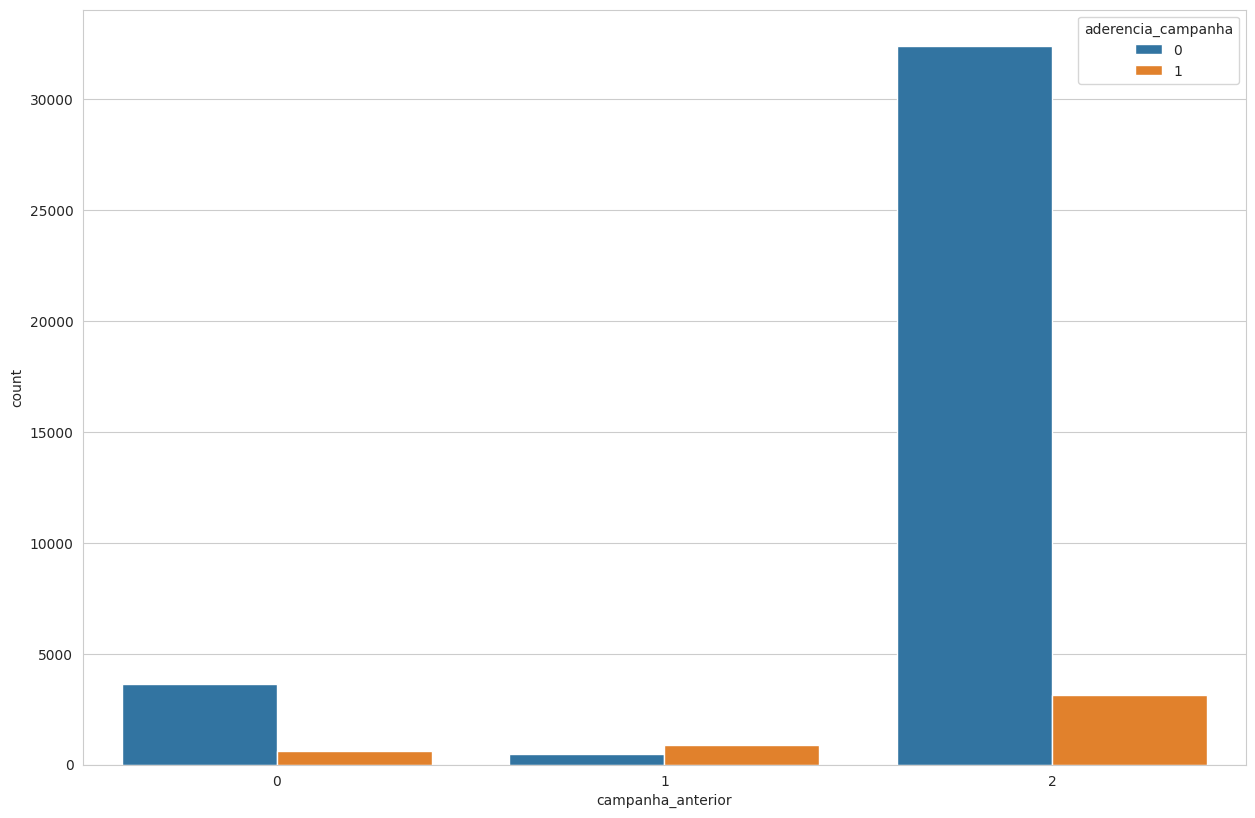

In [37]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=df, x='campanha_anterior', hue='aderencia_campanha')

**Notas**

* Note que obviamente quando a campanha anterior é um fracasso, sucesso, respectivamente a aderencia da campanha tem menos chances de ocorrer e mais chances de ocorrer quando a campanha anterior é um sucesso.
* E importante observar o desbalanceamento na aderencia da campanha para quando a campanha anterior não existiu.


Se analisarmos a partir dos dados balanceados podemos ter uma visão diferente a respeito de quando a campanha anterior foi um fracasso, nota-se que a aderência da campanha acaba até sendo maior, um ponto importante a se observar.

<AxesSubplot:xlabel='campanha_anterior', ylabel='count'>

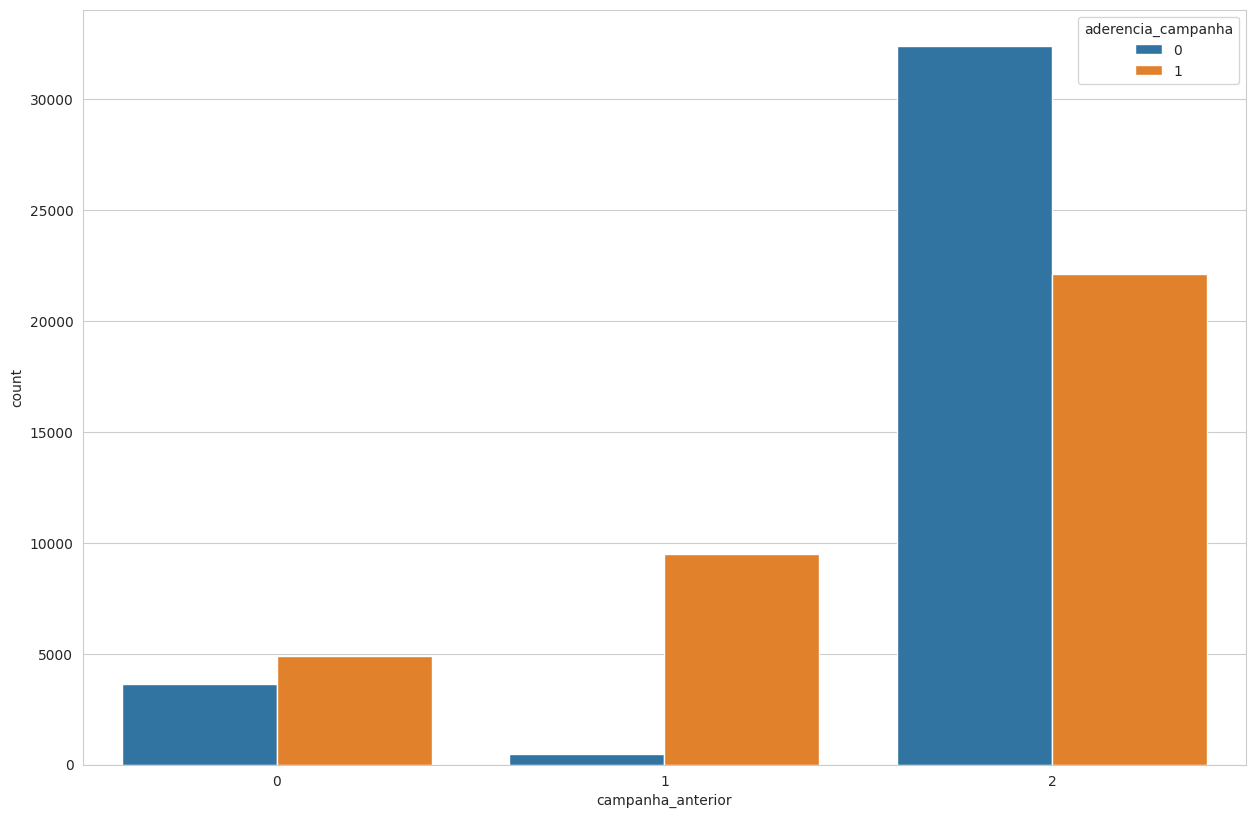

In [38]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=X_dados_balanceados, x='campanha_anterior', hue='aderencia_campanha')

### **Target x emprestimos (Qual o impacto dos emprestimos na aderência da campanha?)**

#### **Emprestimo moradia**

<AxesSubplot:xlabel='emprestimo_moradia', ylabel='count'>

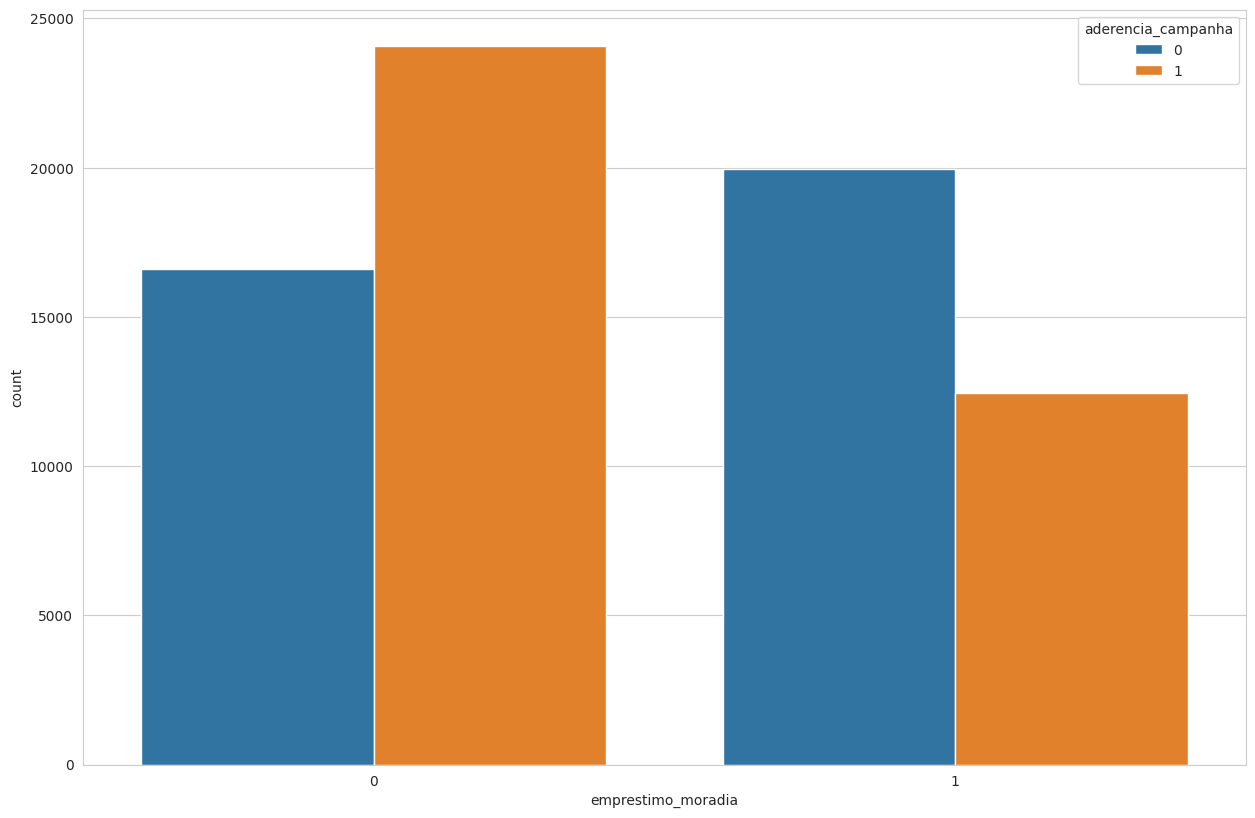

In [39]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=X_dados_balanceados, x='emprestimo_moradia', hue='aderencia_campanha')

#### **Emprestimo pessoal**

<AxesSubplot:xlabel='emprestimo_pessoal', ylabel='count'>

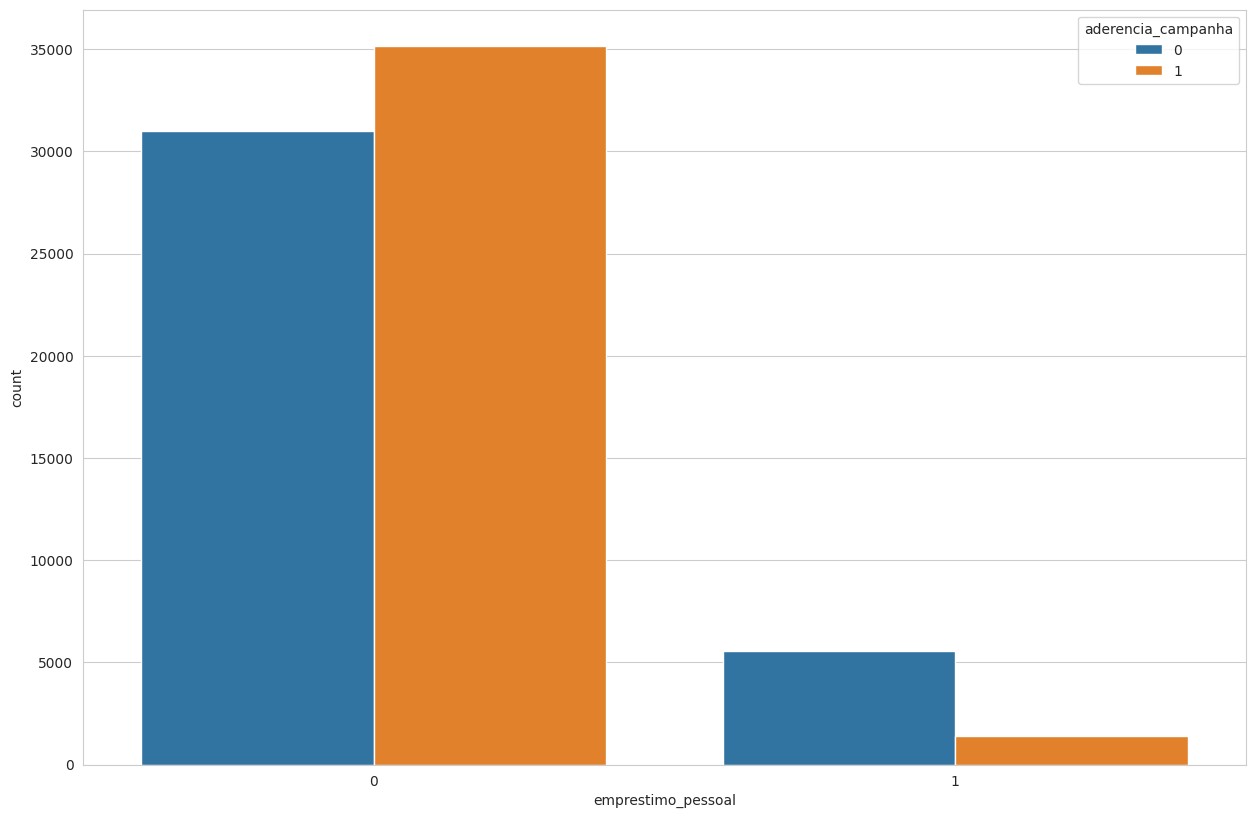

In [40]:
fig,axs = plt.subplots(figsize=(15,10))
sns.countplot(data=X_dados_balanceados, x='emprestimo_pessoal', hue='aderencia_campanha')

**Notas**

* É possível observar que quando uma pessoa não tem um emprestimo seja ele de moradia ou pessoal, as chances de adesão a campanha são maiores, e esse resultado faz sentido tendo em vista que o emprestimo trata-se de uma operação de crédito que acaba impactando a vida financeira das pessoas.

Agora irei o usar o gráfico mapa de calor para avaliar a correlação entre as variáveis. Entender as variaveis que possivelmente se correlacionam e impactam na aderencia da campanha é de extrema importância para quando for construir o modelo. Além das análises realizadas anteriormente.

Então, os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).

Primeiramente irei avaliar a correlação das variáveis que já estavam presentes no conjunto de dados, com exceção das variáveis educação e profissão por serem categóricas. 

In [41]:
vars_corr = X_dados_balanceados[['aderencia_campanha','idade', 'emprestimo_moradia', 'emprestimo_pessoal','meio_contato', 'mes', 'dia_da_semana', 'duracao','qtd_contatos_campanha', 'qtd_contatos_total', 'dias_ultimo_contato', 'campanha_anterior','taxa_juros_media_normalizado', 'indice_precos_consumidor_normalizado', 'indice_confianca_consumidor_normalizado']].copy()

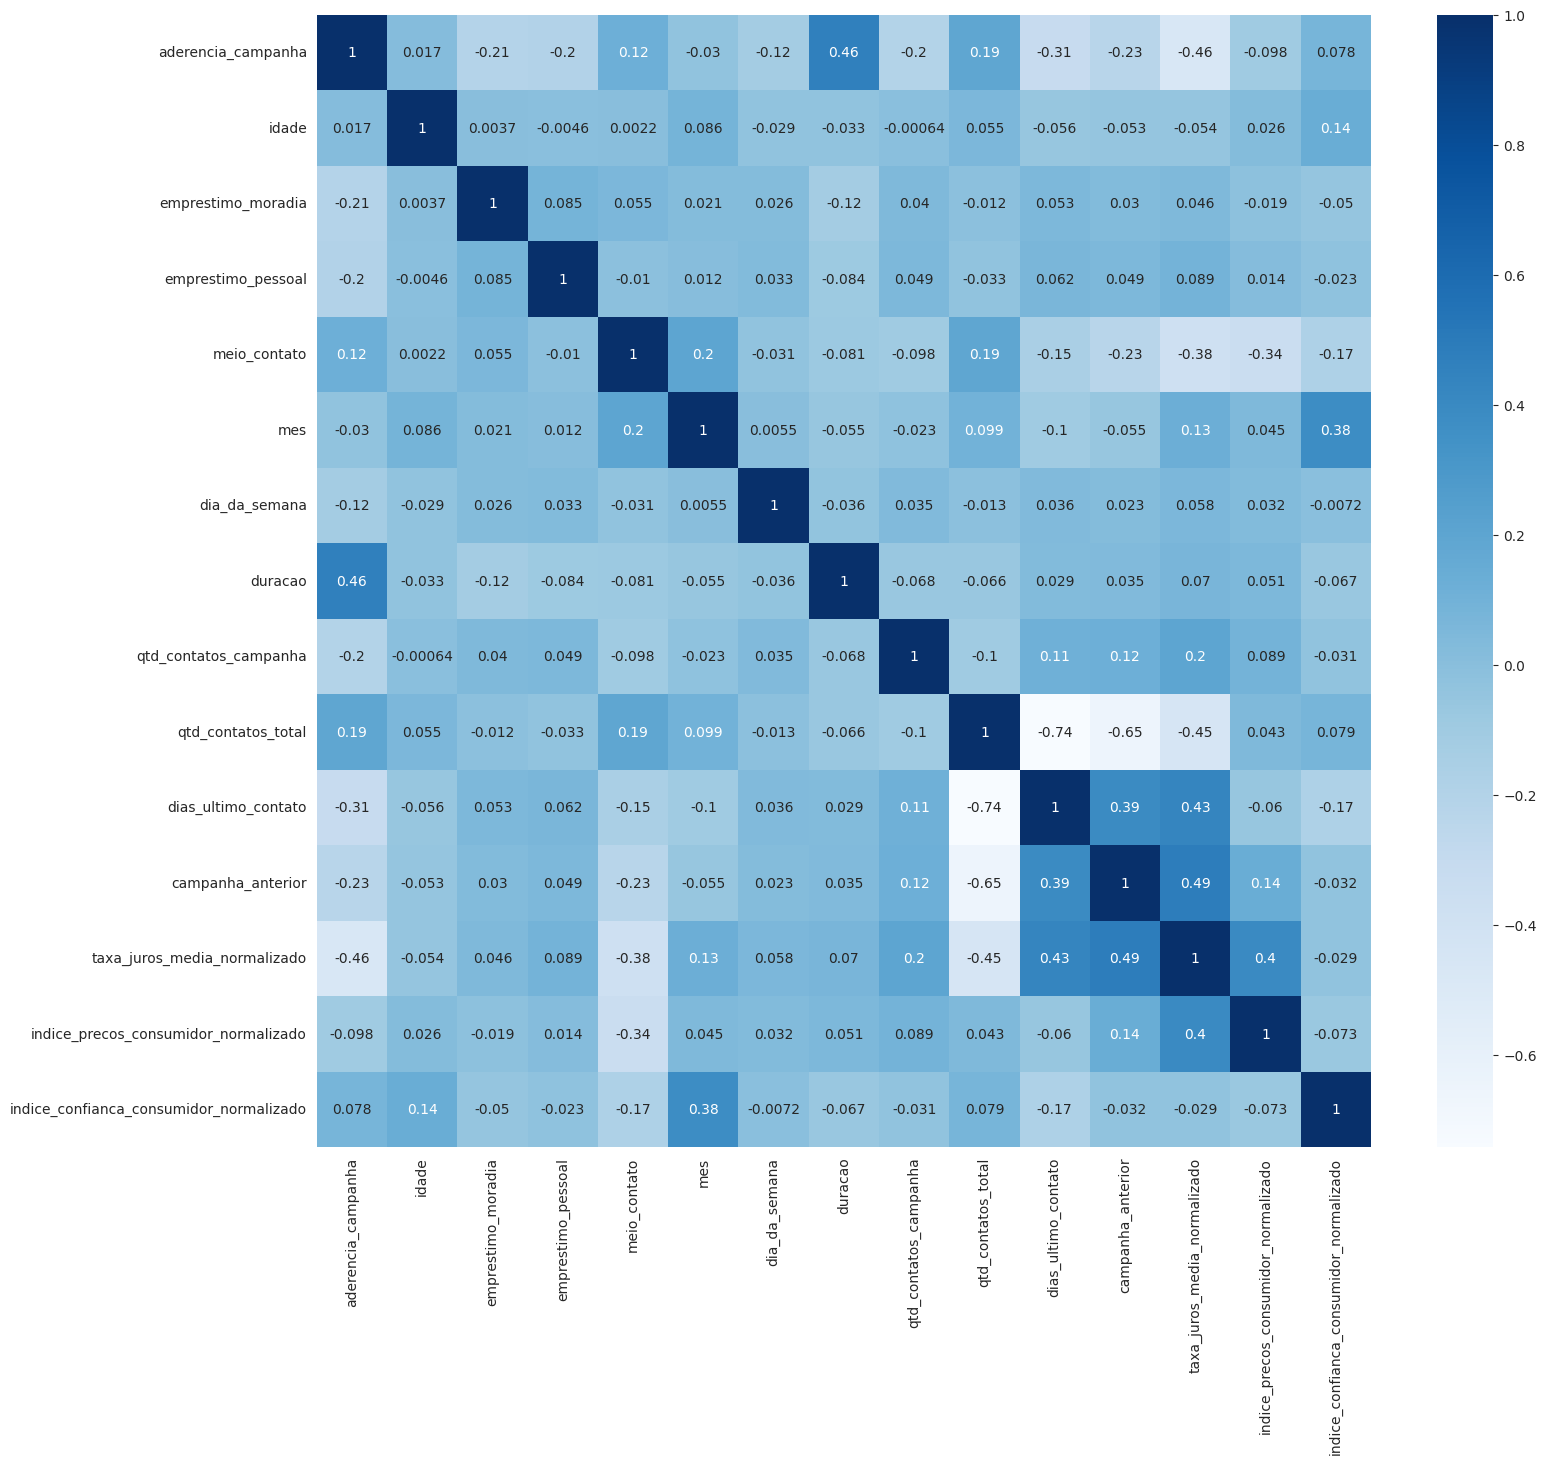

In [42]:
#Construindo o gráfico de mapa de correlação
plt.subplots(figsize=(17,15))
plt.pcolor(vars_corr[vars_corr.columns].corr())
plt.xticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.yticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.xticks(rotation=90)

#Plotando o gráfico
sns.heatmap(vars_corr[vars_corr.columns].corr(),cmap="Blues",annot=True)
plt.show()

**Notas** 

Nota-se então que as principais variáveis que tem correlação com a aderencia da campanha são:
 * idade
 * meio contato
 * duração
 * Quantidade de contatos totais
 * Indice de confiança do consumidor
 
Porém, apesar de algumas variáveis não ter forte correlação, como o caso das variáveis campanha anterior, mês, dias da semana e emprestimos, irei consinderar usar no modelo do problema devido as outras análises que foram realizadas.

Agora irei avaliar a correlação das variáveis binárias que foram criadas a partir da coluna categórica profissão.

In [43]:
vars_corr = X_dados_balanceados[['aderencia_campanha','admin.','aposentado','colarinho_azul','desempregado','dona_casa','empreendedor','estudante','gerente','informal','servicos','tecnico']].copy()

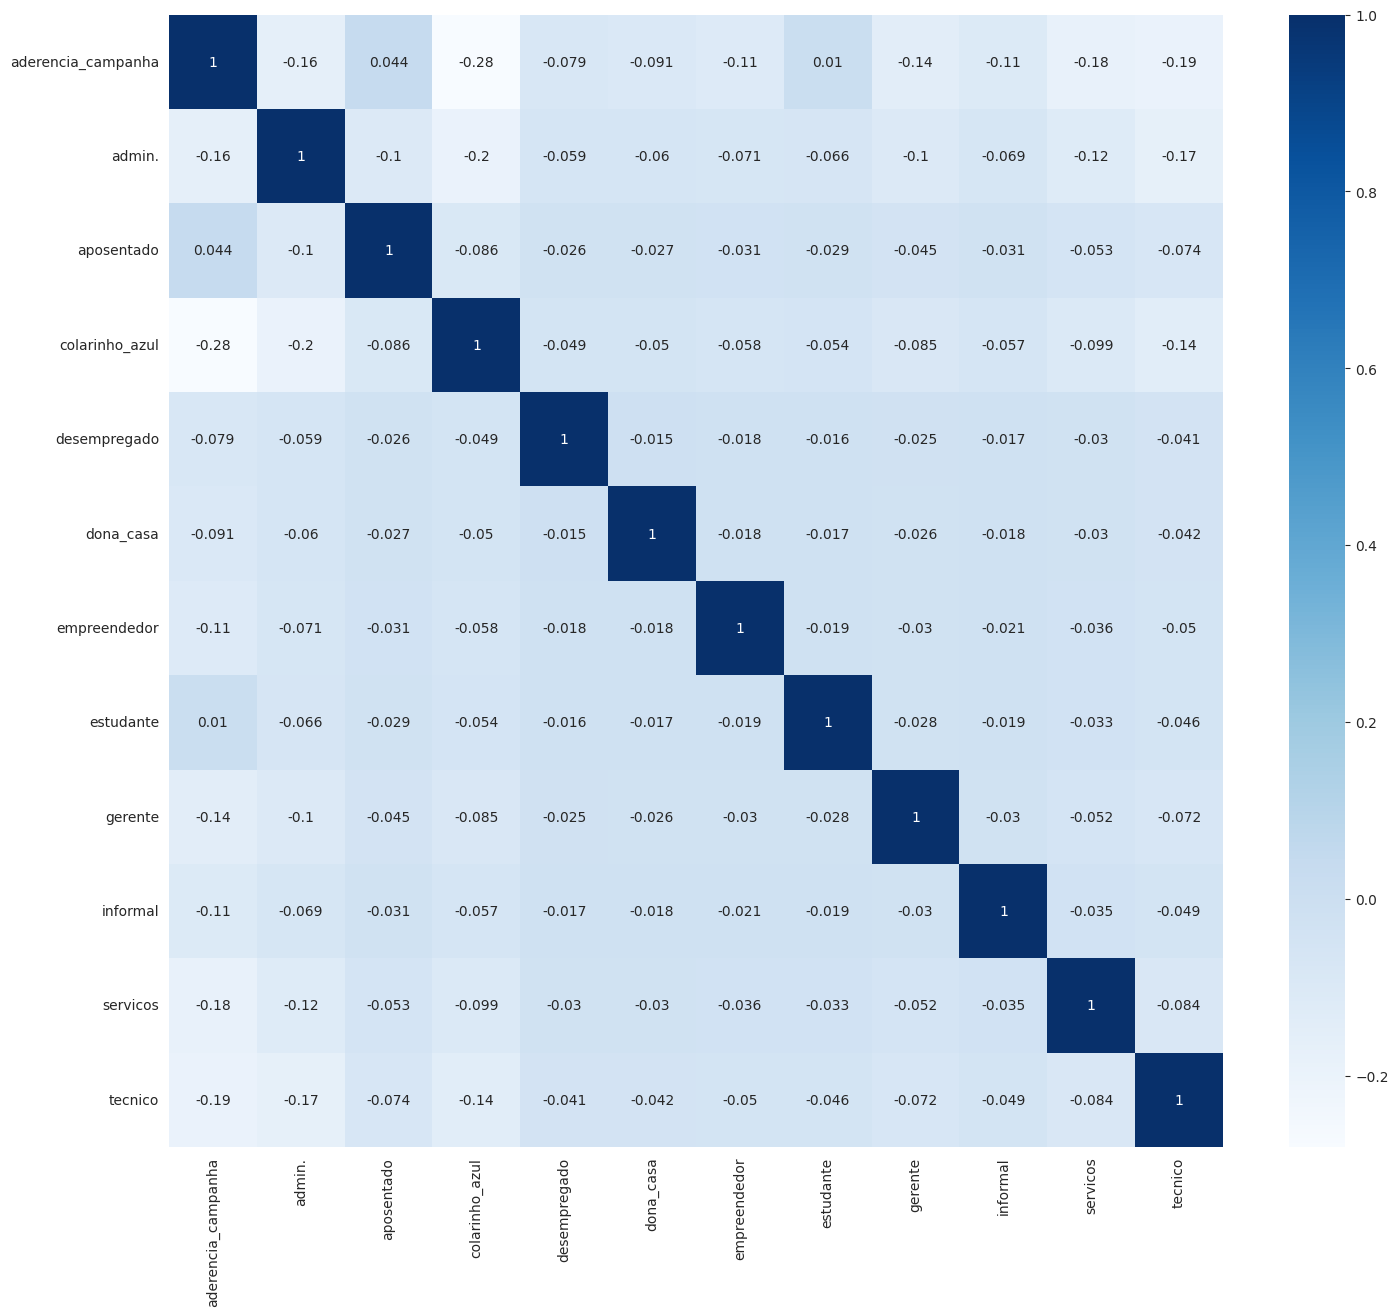

In [44]:
#Construindo o gráfico de mapa de correlação para as variáveis binárias de profissão que foram criadas
plt.subplots(figsize=(17,15))
plt.pcolor(vars_corr[vars_corr.columns].corr('spearman'))
plt.xticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.yticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.xticks(rotation=90)

#Plotando o gráfico
sns.heatmap(vars_corr[vars_corr.columns].corr('spearman'),cmap="Blues",annot=True)
plt.show()

**Notas**

Apesar de está com a correlação negativa, é possível notar que as melhores profissões possui uma correlação mais alta comparada as outras variáveis, o que já tinha sido comentado anteriormente, para este problema que envolve os dados, quanto melhor a profissão/educação maiores são as chances da pessoa aderir a campanha.

Então as variáveis binárias dessas profissões melhores, pode ser cogitada a ser usada no modelo de machine learning.

Agora irei avaliar a correlação das variáveis binárias que foram criadas a partir da coluna categórica educação.

In [45]:
vars_corr = X_dados_balanceados[['analfabeto', 'curso_tecnico', 'ensino_medio', 'fundamental_4a', 'fundamental_6a', 'fundamental_9a', 'graduacao_completa', 'aderencia_campanha']].copy()

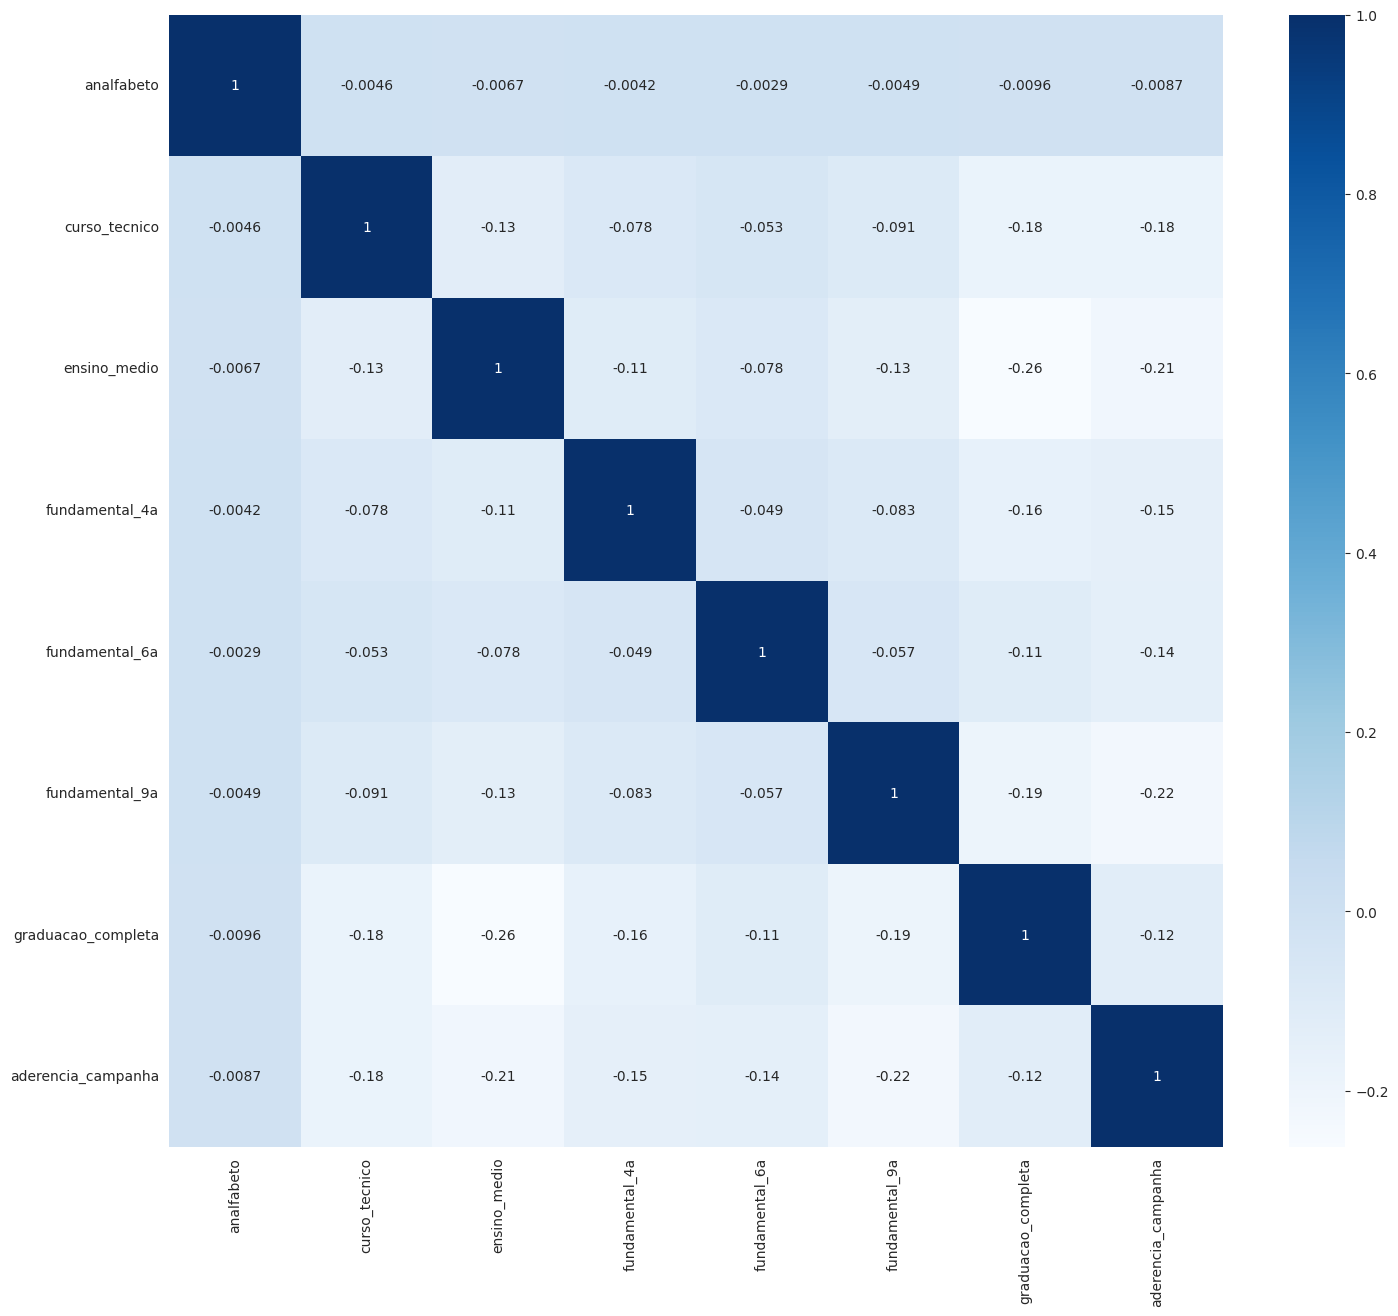

In [46]:
#Construindo o gráfico de mapa de correlação para as variáveis binárias de educação que foram criadas
plt.subplots(figsize=(17,15))
plt.pcolor(vars_corr[vars_corr.columns].corr('spearman'))
plt.xticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.yticks(np.arange(0, len(vars_corr.columns), 1), vars_corr.columns)
plt.xticks(rotation=90)

#Plotando o gráfico
sns.heatmap(vars_corr[vars_corr.columns].corr('spearman'),cmap="Blues",annot=True)
plt.show()

**Notas**

Novamente, as mesmas observações dadas as variáveis binárias de profissão servem para estas, apesar de serem negativas, algumas variáveis podem ser cogitadas a serem usadas no modelo de machine learning, visto que a partir de outras análises foi observado que quanto melhor a educação ou profissão, a pessoa terá mais chances de aderir a campanha.

## **Conclusões**

Quais perguntas foram possíveis de responder com a análise exploratória?

Diante do conjunto de dados que irá treinar o modelo para o problema, se uma pessoa:

* Possui boa educação e profissão.
* Tem idade entre 30 a 40 anos.
* Foi um sucesso na campanha anterior.
* Foi conectada por meio do celular.
* Não tem emprestimos.

As chances dessa pessoa aderir a campanha são maiores.

* Principalmente entre as quartas e quinta-feiras e no primeiro semestre do ano.

Além disso, outras fatores que foram possíveis de identificar e entender é que a **_duração_** e a **_quantidade de contatos_** da campanha também respectivamente tem uma grande influência na aderência da campanha e na não aderência da campanha.

Outro ponto importante é que quando a campanha anterior não existe, também acaba sendo muito relevante tanto para a aderência como a não aderência da campanha, tendo em vista que essa é maior classe dos dados sobre a campanha anterior.

Ademais, as variáveis **_taxa de juros média_**, **_indice de preços consumidor_** e **_indice de confiança do consumidor** também podem acabar implicando positivamente na aderência da campanha. Por esse motivo foram cuidadosamente avaliadas no pré-processamento dos dados.